# Cellular Automata

In [1]:
import sys
sys.path.append('../../Py/Build')
from suite import *
sys.path.append('../../Py/GUI')
from suiteGUI import *
import matplotlib.pyplot as plt
import numpy as np
from math import floor

In [2]:
I = line(0.0,1.0)
mesh = Mesh(1);
mesh.UniformMesh(I,0.05)
mesh

|1D Mesh|
Mesh made by 20.
0. [0.000000,0.050000]
1. [0.050000,0.100000]
2. [0.100000,0.150000]
3. [0.150000,0.200000]
4. [0.200000,0.250000]
5. [0.250000,0.300000]
6. [0.300000,0.350000]
7. [0.350000,0.400000]
8. [0.400000,0.450000]
9. [0.450000,0.500000]
10. [0.500000,0.550000]
11. [0.550000,0.600000]
12. [0.600000,0.650000]
13. [0.650000,0.700000]
14. [0.700000,0.750000]
15. [0.750000,0.800000]
16. [0.800000,0.850000]
17. [0.850000,0.900000]
18. [0.900000,0.950000]
19. [0.950000,1.000000]

In [3]:
A = Automata(mesh,2)

In [4]:
A0 = MeshFunction(mesh,1)
A0.pushFunction(lambda p: [0])

In [5]:
v = A0.vec_export()
# [0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0]
v[2] = 1.0; v[6] = 1.0; v[10]=1.0; v[15]=1.0;
v[17] = 1.0; v[18]=1.0; v[19]=1.0;
A0.vec_import(v);

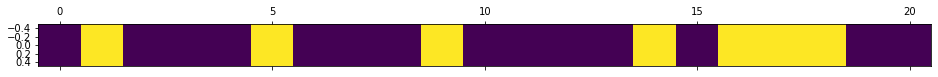

In [6]:
A.Init(A0)
DrawCAState(A,True)

In [7]:
def TransportRule(i,v):
    v = v.to_Array();
    if v[i-1] == 1.0:
            return 1.0;
    else:
            return 0.0;

In [8]:
def Rule(mf):
    rule = MeshFunction(mesh,1);
    v = mf.vec_export()
    h = 1/(mesh.getElNumber());
    rule.pushFunction(lambda P: [TransportRule(floor(P[0]/h),v)])
    return rule;
A.addRule(Rule)

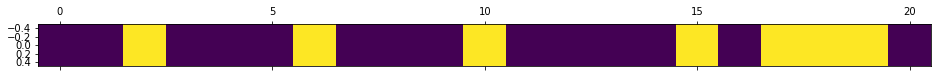

In [9]:
A.Run();
DrawCAState(A,True)

[[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.]
 [1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0.

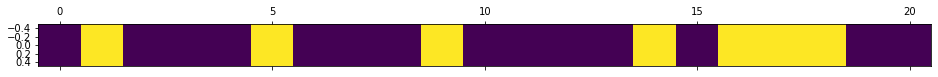

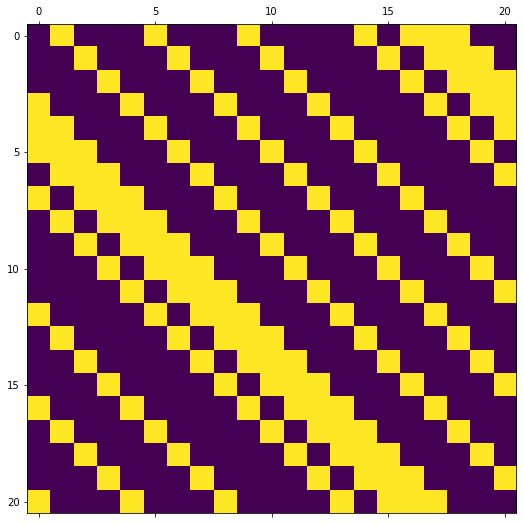

In [10]:
A.Init(A0)
DrawCAState(A,True)
DrawCAStates(A,20,True)